Dataset úspěšně načten!
Rozměry datasetu: (681284, 7)

Prvních 5 řádků:
        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  
2             In het kader van kernfusie op aarde...  
3                   testing!!!  testing!!!            
4               Thanks to Yahoo!'s Toolbar I can ...  

Informace o datasetu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  

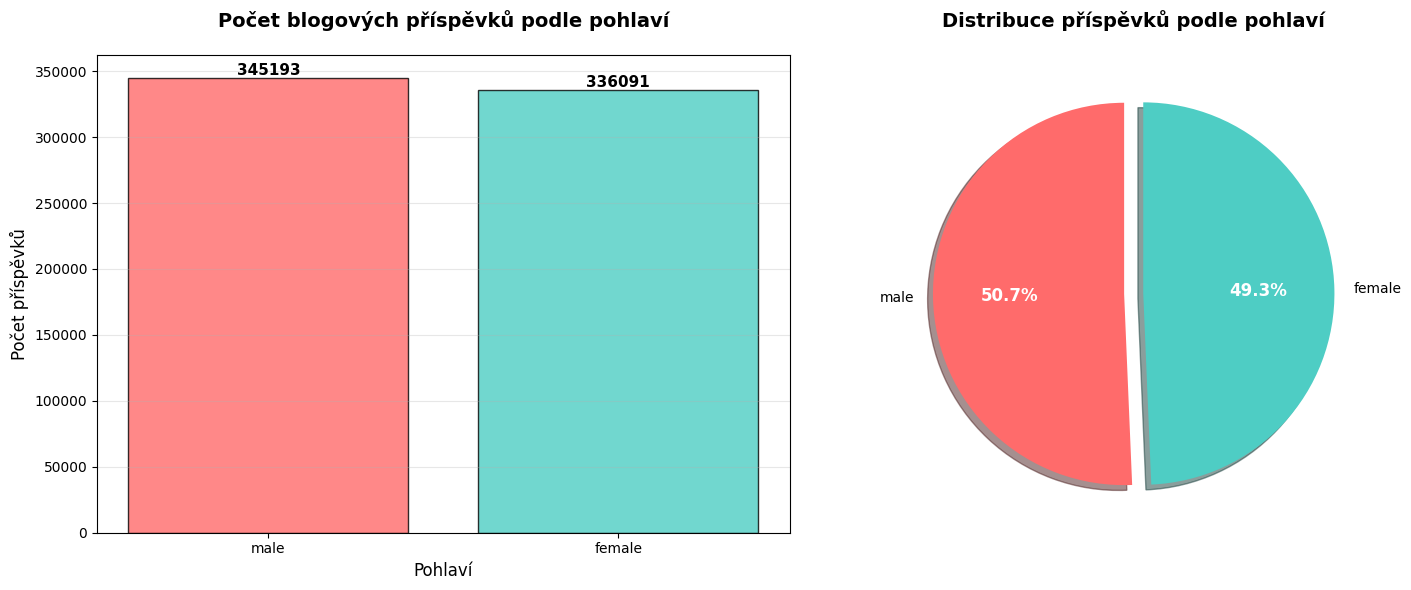


2. ANALÝZA POVOLÁNÍ
Top 10 nejčastějších povolání/témat:
   1. indUnk: 251015 (36.8%)
   2. Student: 153903 (22.6%)
   3. Technology: 42055 (6.2%)
   4. Arts: 32449 (4.8%)
   5. Education: 29633 (4.3%)
   6. Communications-Media: 20140 (3.0%)
   7. Internet: 16006 (2.3%)
   8. Non-Profit: 14700 (2.2%)
   9. Engineering: 11653 (1.7%)
  10. Law: 9040 (1.3%)


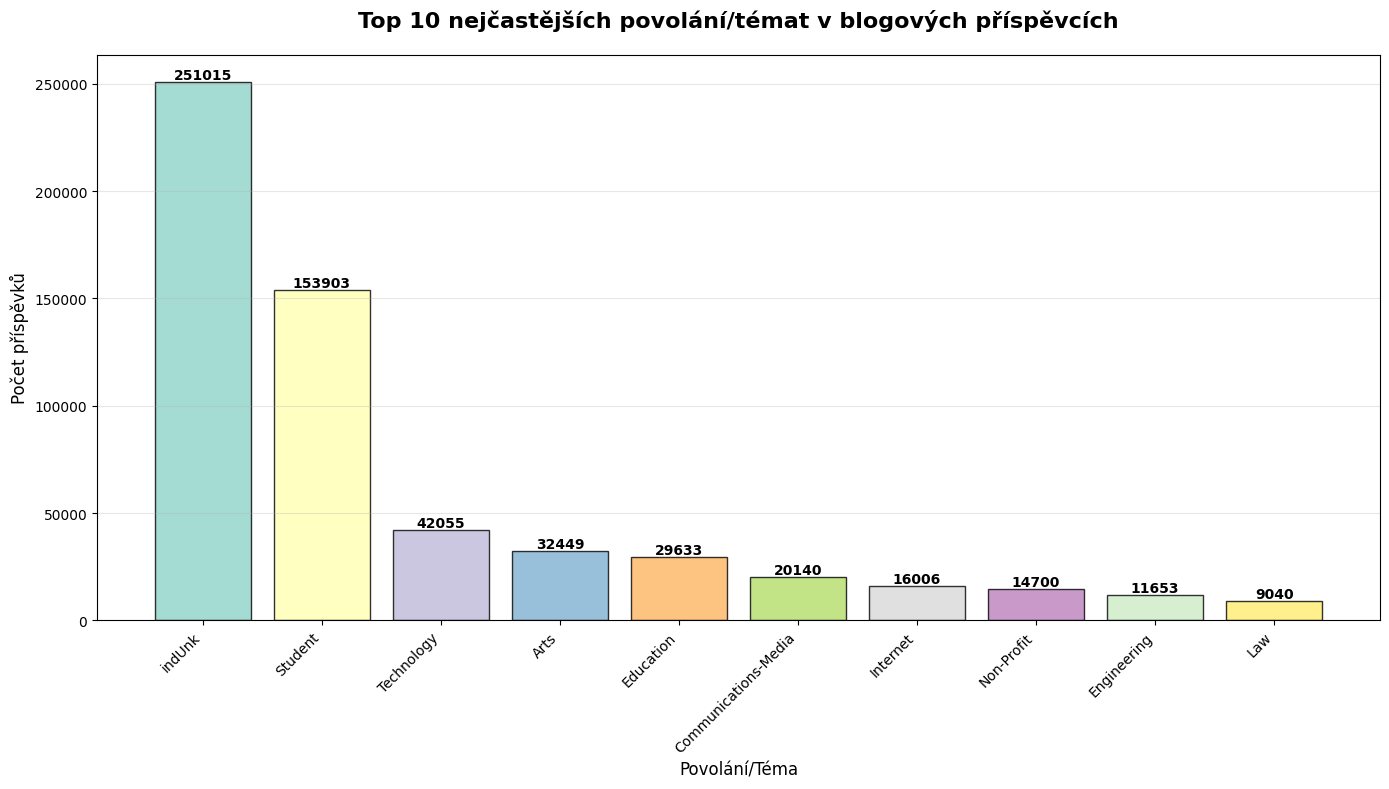


3. ANALÝZA KORELACE POVOLÁNÍ A ZNAMENÍ ZVĚROKRUHU
Kontingenční tabulka (povolání vs znamení):
sign          Aquarius  Aries  Cancer  Capricorn  Gemini   Leo  Libra  Pisces  \
topic                                                                           
Accounting         422     18     445         33     171    57    101     444   
Advertising        832    588     627        122     431   184    156     166   
Agriculture         39     66      28        168      14    30     75     340   
Architecture        51    124     146        109     101    88    199      56   
Arts              2336   1365    1728       2739    2386  1441   4976    2058   

sign          Sagittarius  Scorpio  Taurus  Virgo  
topic                                              
Accounting           1098      140     413    490  
Advertising           428      156     755    231  
Agriculture           109      144     206     16  
Architecture          263      163      83    255  
Arts                 3224

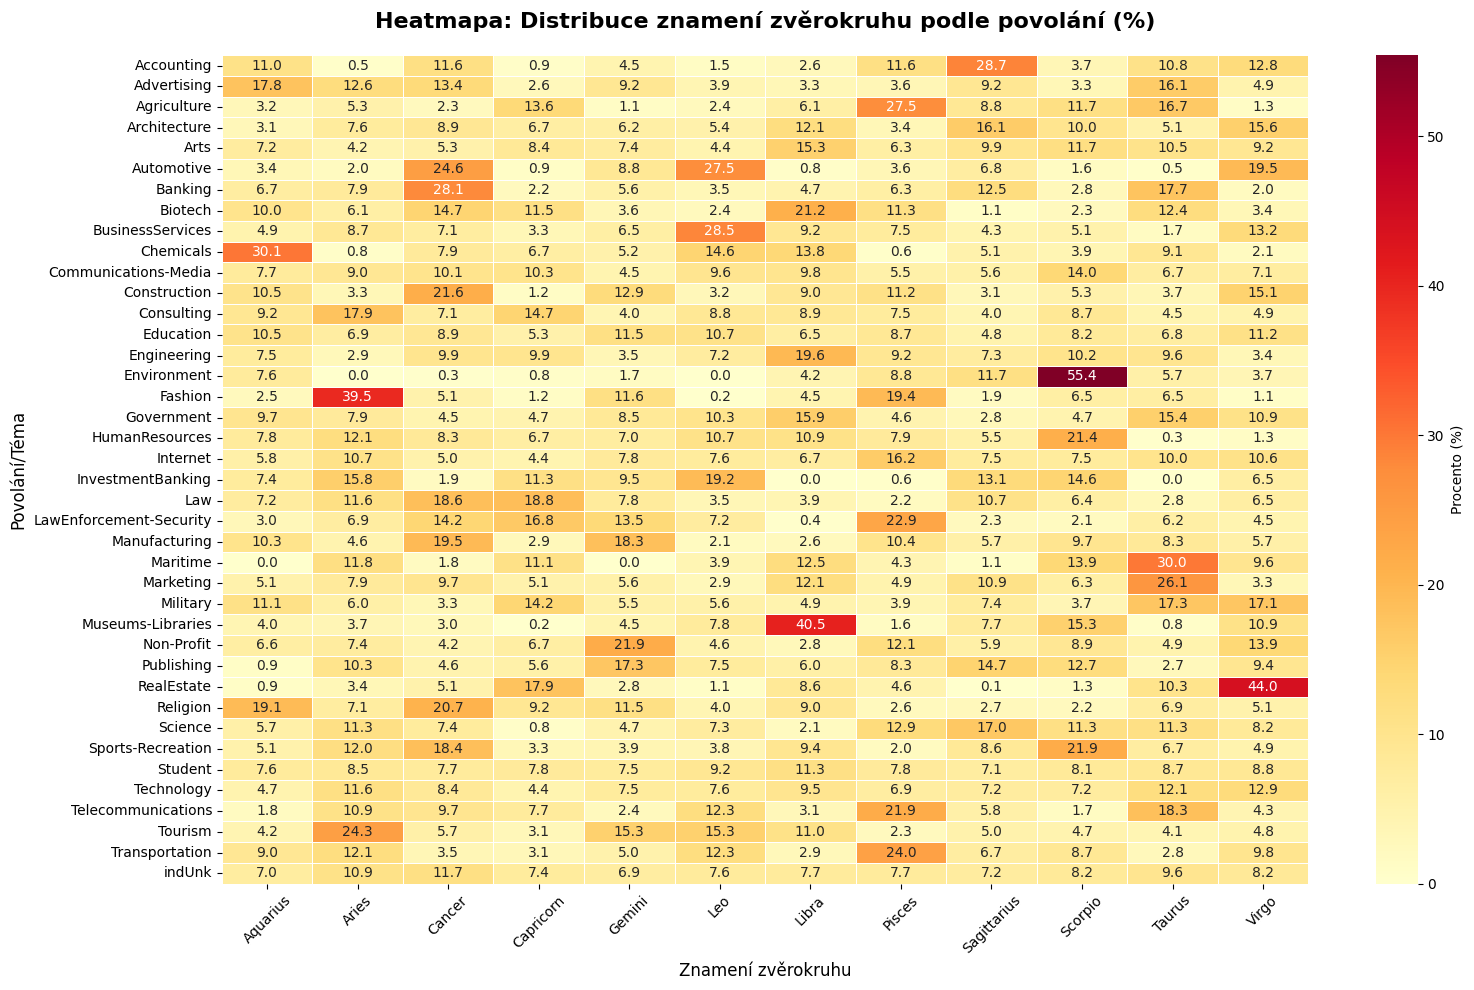


NEJČASTĚJŠÍ KOMBINACE
Top 10 nejčastějších kombinací povolání-znamení:
   1. indUnk + Cancer: 29269 (4.3%)
   2. indUnk + Aries: 27263 (4.0%)
   3. indUnk + Taurus: 24065 (3.5%)
   4. indUnk + Virgo: 20668 (3.0%)
   5. indUnk + Scorpio: 20587 (3.0%)
   6. indUnk + Libra: 19450 (2.9%)
   7. indUnk + Pisces: 19245 (2.8%)
   8. indUnk + Leo: 19027 (2.8%)
   9. indUnk + Capricorn: 18551 (2.7%)
  10. indUnk + Sagittarius: 18111 (2.7%)


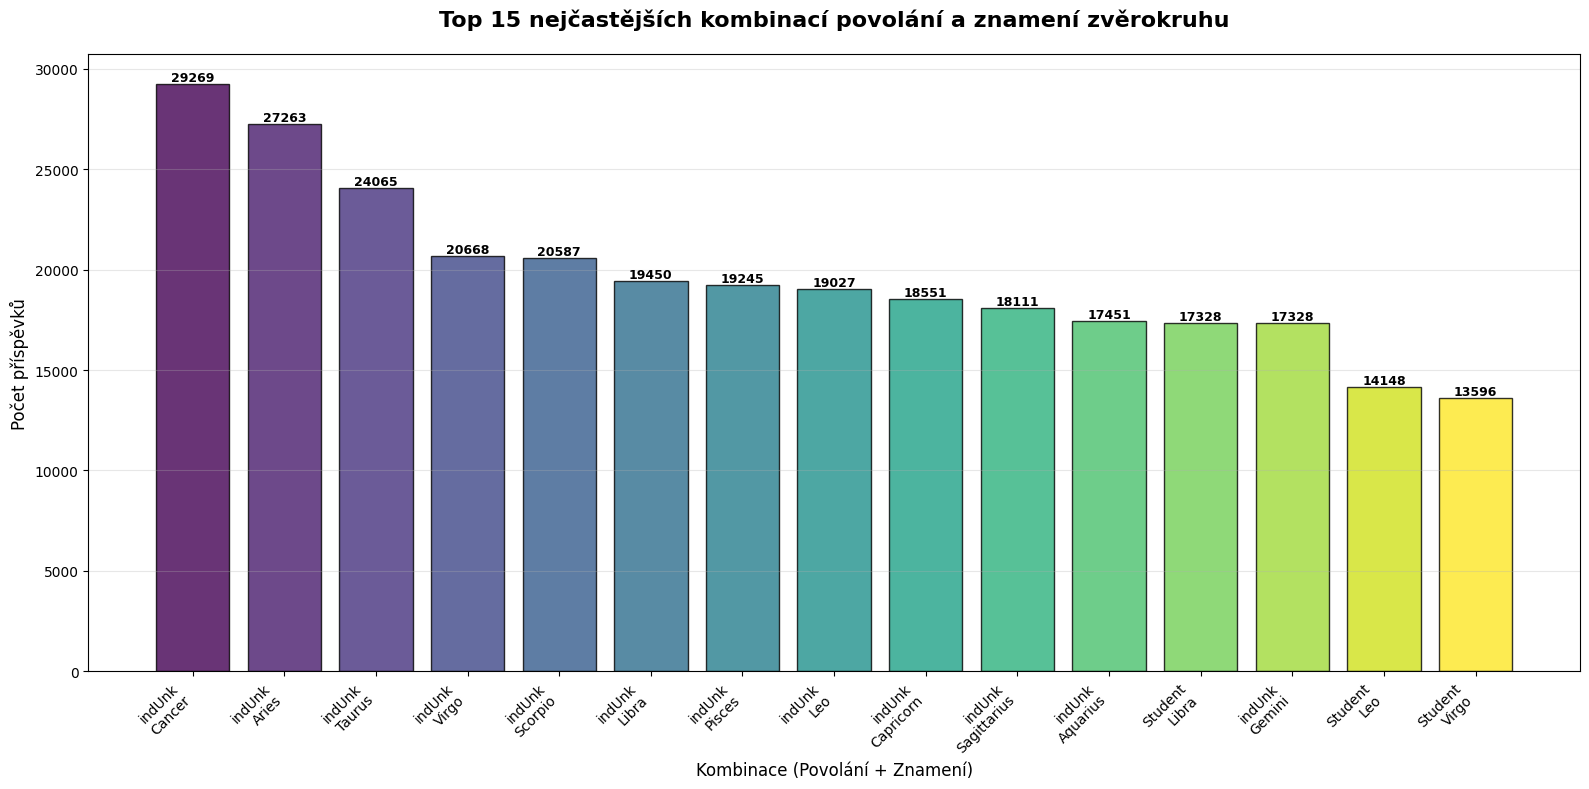


SHRNUTÍ ANALÝZY
1. Genderová distribuce: 345193 mužů vs 336091 žen
2. Nejčastější povolání: indUnk (251015 příspěvků)
3. Korelace povolání-znamení: slabá asociace (Cramér's V = 0.1120)
4. Nejčastější kombinace: indUnk + Cancer (29269 příspěvků)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Nastavení stylu pro grafy
plt.style.use('default')
sns.set_palette("husl")

# Načtení dat
try:
    # Pokusíme se načíst CSV soubor
    df = pd.read_csv('blogtext.csv')
    print("Dataset úspěšně načten!")
    print(f"Rozměry datasetu: {df.shape}")
    print("\nPrvních 5 řádků:")
    print(df.head())
    print("\nInformace o datasetu:")
    print(df.info())
    print("\nChybějící hodnoty:")
    print(df.isnull().sum())
except FileNotFoundError:
    print("Soubor 'blogtext.csv' nebyl nalezen. Vytvořím ukázkový dataset z poskytnutých dat.")
    
    # # Vytvoření ukázkového datasetu z poskytnutých dat
    # sample_data = [
    #     {'id': 2059027, 'gender': 'male', 'age': 15, 'topic': 'Student', 'sign': 'Leo', 'date': '14,May,2004', 'text': 'Info has been found...'},
    #     {'id': 2059027, 'gender': 'male', 'age': 15, 'topic': 'Student', 'sign': 'Leo', 'date': '13,May,2004', 'text': 'These are the team members...'},
    #     {'id': 2059027, 'gender': 'male', 'age': 15, 'topic': 'Student', 'sign': 'Leo', 'date': '12,May,2004', 'text': 'In het kader van kernfusie...'},
    #     {'id': 3581210, 'gender': 'male', 'age': 33, 'topic': 'InvestmentBanking', 'sign': 'Aquarius', 'date': '11,June,2004', 'text': 'Thanks to Yahoo...'},
    #     {'id': 3581210, 'gender': 'male', 'age': 33, 'topic': 'InvestmentBanking', 'sign': 'Aquarius', 'date': '10,June,2004', 'text': 'I had an interesting conversation...'}
    # ]
    
    # # Pro demonstraci vytvoříme větší ukázkový dataset
    # extended_data = []
    # genders = ['male', 'female']
    # topics = ['Student', 'InvestmentBanking', 'Technology', 'Marketing', 'Education', 'Healthcare', 'Engineering', 'Arts', 'Law', 'Science', 'Business', 'Communications']
    # signs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']
    
    # np.random.seed(42)
    # for i in range(1000):
    #     extended_data.append({
    #         'id': np.random.randint(1000000, 9999999),
    #         'gender': np.random.choice(genders, p=[0.52, 0.48]),  # Mírně více mužů
    #         'age': np.random.randint(13, 48),
    #         'topic': np.random.choice(topics),
    #         'sign': np.random.choice(signs),
    #         'date': f"{np.random.randint(1,28)},May,2004",
    #         'text': f'Sample blog post {i}'
    #     })
    
    # df = pd.DataFrame(extended_data)
    # print("Vytvořen ukázkový dataset pro demonstraci analýzy.")
    # print(f"Rozměry datasetu: {df.shape}")

# Základní statistiky
print("\n" + "="*50)
print("ZÁKLADNÍ STATISTIKY DATASETU")
print("="*50)
print(f"Celkový počet blogových příspěvků: {len(df)}")
print(f"Počet unikátních autorů: {df['id'].nunique()}")
print(f"Věkové rozpětí: {df['age'].min()} - {df['age'].max()} let")
print(f"Průměrný věk: {df['age'].mean():.1f} let")

# 1. VIZUALIZACE: Počet článků muži vs ženy
print("\n" + "="*50)
print("1. ANALÝZA POHLAVÍ")
print("="*50)

gender_counts = df['gender'].value_counts()
print("Počet příspěvků podle pohlaví:")
for gender, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {gender.capitalize()}: {count} ({percentage:.1f}%)")

# Vytvoření grafu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Sloupcový graf
colors = ['#FF6B6B', '#4ECDC4']
bars = ax1.bar(gender_counts.index, gender_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Počet blogových příspěvků podle pohlaví', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Pohlaví', fontsize=12)
ax1.set_ylabel('Počet příspěvků', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Přidání hodnot na sloupcový graf
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Koláčový graf
wedges, texts, autotexts = ax2.pie(gender_counts.values, labels=gender_counts.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   explode=(0.05, 0.05), shadow=True)
ax2.set_title('Distribuce příspěvků podle pohlaví', fontsize=14, fontweight='bold', pad=20)

# Úprava textu v koláčovém grafu
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

# 2. VIZUALIZACE: Top 10 nejčastějších povolání
print("\n" + "="*50)
print("2. ANALÝZA POVOLÁNÍ")
print("="*50)

topic_counts = df['topic'].value_counts().head(10)
print("Top 10 nejčastějších povolání/témat:")
for i, (topic, count) in enumerate(topic_counts.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"  {i:2d}. {topic}: {count} ({percentage:.1f}%)")

# Vytvoření grafu pro top 10 povolání
plt.figure(figsize=(14, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(topic_counts)))
bars = plt.bar(range(len(topic_counts)), topic_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

plt.title('Top 10 nejčastějších povolání/témat v blogových příspěvcích', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Povolání/Téma', fontsize=12)
plt.ylabel('Počet příspěvků', fontsize=12)
plt.xticks(range(len(topic_counts)), topic_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Přidání hodnot na sloupcový graf
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. VIZUALIZACE: Korelace mezi povoláním a znamením zvěrokruhu
print("\n" + "="*50)
print("3. ANALÝZA KORELACE POVOLÁNÍ A ZNAMENÍ ZVĚROKRUHU")
print("="*50)

# Vytvoření kontingenční tabulky
contingency_table = pd.crosstab(df['topic'], df['sign'])
print("Kontingenční tabulka (povolání vs znamení):")
print(contingency_table.head())

# Chi-square test pro testování nezávislosti
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test:")
print(f"Chi-square statistika: {chi2:.4f}")
print(f"P-hodnota: {p_value:.4f}")
print(f"Stupně volnosti: {dof}")

if p_value < 0.05:
    print("Výsledek: Existuje statisticky signifikantní závislost mezi povoláním a znamením zvěrokruhu (p < 0.05)")
else:
    print("Výsledek: Neexistuje statisticky signifikantní závislost mezi povoláním a znamením zvěrokruhu (p >= 0.05)")

# Výpočet Cramér's V pro sílu asociace
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V (síla asociace): {cramers_v:.4f}")

# Interpretace Cramér's V
if cramers_v < 0.1:
    interpretation = "velmi slabá"
elif cramers_v < 0.3:
    interpretation = "slabá"
elif cramers_v < 0.5:
    interpretation = "střední"
else:
    interpretation = "silná"
print(f"Interpretace: {interpretation} asociace")

# Vytvoření heatmapy pro kontingenční tabulku
plt.figure(figsize=(16, 10))

# Normalizace podle řádků pro lepší vizualizaci
contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

sns.heatmap(contingency_normalized, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Procento (%)'}, linewidths=0.5)
plt.title('Heatmapa: Distribuce znamení zvěrokruhu podle povolání (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Znamení zvěrokruhu', fontsize=12)
plt.ylabel('Povolání/Téma', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Detailní analýza nejčastějších kombinací
print("\n" + "="*30)
print("NEJČASTĚJŠÍ KOMBINACE")
print("="*30)

# Flatten the contingency table to get top combinations
combinations = []
for topic in contingency_table.index:
    for sign in contingency_table.columns:
        combinations.append((topic, sign, contingency_table.loc[topic, sign]))

# Sort by count
combinations.sort(key=lambda x: x[2], reverse=True)

print("Top 10 nejčastějších kombinací povolání-znamení:")
for i, (topic, sign, count) in enumerate(combinations[:10], 1):
    percentage = (count / len(df)) * 100
    print(f"  {i:2d}. {topic} + {sign}: {count} ({percentage:.1f}%)")

# Vizualizace top kombinací
top_combinations = combinations[:15]  # Top 15 pro lepší vizualizaci
combo_labels = [f"{topic}\n{sign}" for topic, sign, count in top_combinations]
combo_counts = [count for topic, sign, count in top_combinations]

plt.figure(figsize=(16, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(combo_counts)))
bars = plt.bar(range(len(combo_counts)), combo_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

plt.title('Top 15 nejčastějších kombinací povolání a znamení zvěrokruhu', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kombinace (Povolání + Znamení)', fontsize=12)
plt.ylabel('Počet příspěvků', fontsize=12)
plt.xticks(range(len(combo_counts)), combo_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

# Přidání hodnot na sloupcový graf
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SHRNUTÍ ANALÝZY")
print("="*50)
print(f"1. Genderová distribuce: {gender_counts['male']} mužů vs {gender_counts['female']} žen")
print(f"2. Nejčastější povolání: {topic_counts.index[0]} ({topic_counts.iloc[0]} příspěvků)")
print(f"3. Korelace povolání-znamení: {interpretation} asociace (Cramér's V = {cramers_v:.4f})")
print(f"4. Nejčastější kombinace: {combinations[0][0]} + {combinations[0][1]} ({combinations[0][2]} příspěvků)")